In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("C:/Users/ajaym/Downloads/T-20 World cup 2022.csv")

In [4]:
train_data.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


In [6]:
train_data.shape

(9814, 44)

In [7]:
train_data.isnull().sum()

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

In [8]:
train_data.dtypes

comment_id             int64
match_id               int64
match_name            object
home_team             object
away_team             object
current_innings       object
innings_id             int64
over                   int64
ball                   int64
runs                   int64
shortText             object
isBoundary              bool
isWide                  bool
isNoball                bool
batsman1_id            int64
batsman1_name         object
batsman1_runs          int64
batsman1_balls         int64
bowler1_id             int64
bowler1_name          object
bowler1_overs        float64
bowler1_maidens        int64
bowler1_runs           int64
bowler1_wkts           int64
batsman2_id            int64
batsman2_name         object
batsman2_runs          int64
batsman2_balls         int64
bowler2_id           float64
bowler2_name          object
bowler2_overs        float64
bowler2_maidens      float64
bowler2_runs         float64
bowler2_wkts         float64
wicket_id     

In [9]:
# CLEANING THE DATA 

In [10]:
missing_value = train_data.isnull().sum()

In [12]:
missing_value[missing_value > 0] # Displays the columns that has missing values 

bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_balls    9263
wkt_text             9263
text                   28
preText              7953
postText             8726
dtype: int64

In [13]:
col_to_zero = ['bowler2_id', 'bowler2_overs', 'bowler2_maidens', 
    'bowler2_runs', 'bowler2_wkts', 'wkt_batsman_runs', 'wkt_batsman_balls']

In [14]:
train_data[col_to_zero] = train_data[col_to_zero].fillna(0)

In [16]:
m2 = train_data.isnull().sum()

In [17]:
missing_value[m2 > 0]

bowler2_name         526
wicket_id           9263
wkt_batsman_name    9263
wkt_bowler_name     9263
wkt_text            9263
text                  28
preText             7953
postText            8726
dtype: int64

# This is for the text columns 

In [18]:
text_columns = ['wkt_batsman_name', 'wkt_bowler_name', 'wkt_text', 'text', 'preText', 'postText']

In [20]:
train_data[text_columns] = train_data[text_columns].fillna('')

In [27]:
categorical_columns = ['match_name', 'home_team', 'away_team', 'current_innings', 'batsman1_name', 'bowler1_name', 'batsman2_name', 'bowler2_name']

In [28]:
train_data[categorical_columns] = train_data[categorical_columns].astype('category')

In [29]:
#Checking if all the rows and columns are properly cleaned 


In [30]:
missing_value = train_data.isnull().sum()

In [31]:
missing_value[missing_value > 0]

bowler2_name     526
wicket_id       9263
dtype: int64

In [32]:
train_data.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,,,0.0,0.0,,False,"short again, and he gets some extra bounce on ...",,
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,,,0.0,0.0,,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,,,0.0,0.0,,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,,,0.0,0.0,,False,"shortish, angling down leg, gloves a pull down...",,
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,,,0.0,0.0,,False,"length ball close to off stump, straightens a ...",,


In [ ]:
# Data Cleaning is done 

In [33]:
descriptive_statistics = train_data.describe(include = 'all')

In [34]:
descriptive_statistics

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
count,9814.000000,9.814000e+03,9814,9814,9814,9814,9814.000000,9814.000000,9814.000000,9814.000000,...,5.510000e+02,9814,9814,9814.000000,9814.000000,9814,9814,9814,9814,9814
unique,NaN,NaN,42,16,15,16,NaN,NaN,NaN,NaN,...,NaN,173,114,NaN,NaN,552,2,9706,1831,1085
top,NaN,NaN,NAM v UAE,INDIA,NED,NED,NaN,NaN,NaN,NaN,...,NaN,,,NaN,NaN,,False,,,
freq,NaN,NaN,250,1167,1468,971,NaN,NaN,NaN,NaN,...,NaN,9263,9263,NaN,NaN,9263,9813,28,7953,8726
mean,85399.661708,1.298157e+06,NaN,NaN,NaN,NaN,1.477787,10.082841,3.486856,1.202262,...,5.691470e+05,NaN,NaN,0.843795,0.774811,NaN,NaN,NaN,NaN,NaN
std,78951.670137,1.355630e+01,NaN,NaN,NaN,NaN,0.499532,5.623045,1.707484,1.476730,...,3.305531e+05,NaN,NaN,5.212332,4.216092,NaN,NaN,NaN,NaN,NaN
min,110.000000,1.298135e+06,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,...,5.334000e+03,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,18030.000000,1.298145e+06,NaN,NaN,NaN,NaN,1.000000,5.000000,2.000000,0.000000,...,3.233890e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,29010.000000,1.298157e+06,NaN,NaN,NaN,NaN,1.000000,10.000000,3.000000,1.000000,...,4.824780e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,118040.000000,1.298169e+06,NaN,NaN,NaN,NaN,2.000000,15.000000,5.000000,1.000000,...,8.337770e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [36]:
train_data.head(20)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,,,0.0,0.0,,False,"short again, and he gets some extra bounce on ...",,
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,,,0.0,0.0,,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,,,0.0,0.0,,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,,,0.0,0.0,,False,"shortish, angling down leg, gloves a pull down...",,
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,,,0.0,0.0,,False,"length ball close to off stump, straightens a ...",,
5,160,1298179,ENG v PAK,PAK,ENG,PAK,1,1,4,1,...,NaN,,,0.0,0.0,,False,"full outside off, and that's <strong>nervy run...",,
6,170,1298179,ENG v PAK,PAK,ENG,PAK,1,1,5,0,...,NaN,,,0.0,0.0,,False,"length ball outside off, swinging away a littl...",,
7,180,1298179,ENG v PAK,PAK,ENG,PAK,1,1,6,3,...,NaN,,,0.0,0.0,,False,"shortish, a hint of width, and Babar rolls his...",,
8,11020,1298179,ENG v PAK,PAK,ENG,PAK,1,2,1,0,...,NaN,,,0.0,0.0,,False,there's the Babar cover drive. Half-volley clo...,,
9,11010,1298179,ENG v PAK,PAK,ENG,PAK,1,2,1,1,...,NaN,,,0.0,0.0,,False,"looks for outswing from a leg-stumpish line, b...","<p>An eventful start, but no damage yet, in ei...",


In [37]:
pd.set_option('display.max_columns', None)

In [38]:
train_data

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,shortText,isBoundary,isWide,isNoball,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls,bowler1_id,bowler1_name,bowler1_overs,bowler1_maidens,bowler1_runs,bowler1_wkts,batsman2_id,batsman2_name,batsman2_runs,batsman2_balls,bowler2_id,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,"Stokes to Mohammad Rizwan, no run",False,False,False,323389,Mohammad Rizwan,0,2,311158,Ben Stokes,0.1,0,2,0,348144,Babar Azam,0,0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,,,0.0,0.0,,False,"short again, and he gets some extra bounce on ...",,
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 wide",False,True,False,323389,Mohammad Rizwan,0,1,311158,Ben Stokes,0.0,0,2,0,348144,Babar Azam,0,0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,,,0.0,0.0,,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 no ball",False,False,True,323389,Mohammad Rizwan,0,1,311158,Ben Stokes,0.0,0,1,0,348144,Babar Azam,0,0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,,,0.0,0.0,,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,"Stokes to Mohammad Rizwan, 2 runs",False,False,False,323389,Mohammad Rizwan,2,3,311158,Ben Stokes,0.2,0,4,0,348144,Babar Azam,0,0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,,,0.0,0.0,,False,"shortish, angling down leg, gloves a pull down...",,
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,"Stokes to Mohammad Rizwan, no run",False,False,False,323389,Mohammad Rizwan,2,4,311158,Ben Stokes,0.3,0,4,0,348144,Babar Azam,0,0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,,,0.0,0.0,,False,"length ball close to off stump, straightens a ...",,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,218020,1298135,NAM v SL,NAM,SL,SL,2,19,2,1,"Wiese to Theekshana, 1 run",False,False,False,1138316,Maheesh Theekshana,11,11,221140,David Wiese,3.2,0,16,1,552152,Dushmantha Chameera,8,11,482478.0,Jan Frylinck,4.0,0.0,26.0,2.0,NaN,,,0.0,0.0,,False,"slower ball on a length, waits for this and op...",,
9810,218030,1298135,NAM v SL,NAM,SL,SL,2,19,3,0,"Wiese to Chameera, no run",False,False,False,552152,Dushmantha Chameera,8,12,221140,David Wiese,3.3,0,16,1,1138316,Maheesh Theekshana,11,11,482478.0,Jan Frylinck,4.0,0.0,26.0,2.0,NaN,,,0.0,0.0,,False,"another slower ball, keeps very low. Bounces t...",,
9811,218040,1298135,NAM v SL,NAM,SL,SL,2,19,4,0,"Wiese to Chameera, no run",False,False,False,552152,Dushmantha Chameera,8,13,221140,David Wiese,3.4,0,16,1,1138316,Maheesh Theekshana,11,11,482478.0,Jan Frylinck,4.0,0.0,26.0,2.0,NaN,,,0.0,0.0,,False,Almost cleans him up! Yorker finds it's way pa...,,
9812,218050,1298135,NAM v SL,NAM,SL,SL,2,19,5,0,"Wiese to Chameera, no run",False,False,False,552152,Dushmantha Chameera,8,14,221140,David Wiese,3.5,0,16,1,1138316,Maheesh Theekshana,11,11,482478.0,Jan Frylinck,4.0,0.0,26.0,2.0,NaN,,,0.0,0.0,,False,"short ball, goes for the uppercut and misses",,


In [39]:
# Visualizations 

In [65]:
import matplotlib.pyplot as plt 

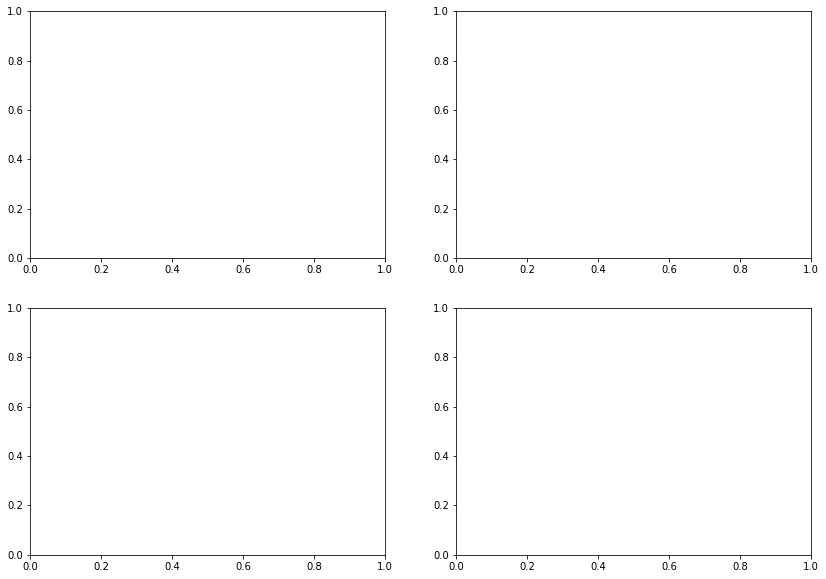

In [66]:
fig, ax = plt.subplots(2,2, figsize = (14, 10))

In [67]:
train_data['runs'].plot(kind = 'hist', bins = 8, ax = ax[0 , 0], color = 'blue')

<AxesSubplot:ylabel='Frequency'>

In [68]:
# Histogram of runs scored per ball 

In [79]:
train_data['runs'].plot(kind='hist', bins=8, ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Distribution of Runs per Ball')
ax[0, 0].set_xlabel('Runs')
ax[0, 0].set_ylabel('Frequency')


Text(3.200000000000017, 0.5, 'Frequency')

In [70]:
# Histogram of balls bowled per over 

In [71]:
train_data['ball'].plot(kind='hist', bins=6, ax=ax[0, 1], color='green')
ax[0, 1].set_title('Distribution of Balls per over')
ax[0, 1].set_xlabel('Balls')
ax[0, 1].set_ylabel('Frequency')


Text(429.30909090909086, 0.5, 'Frequency')

In [72]:
train_data['home_team'].value_counts().nlargest(10).plot( kind = 'bar', ax = ax[1,0], color = 'red')
ax[1,0].set_title('Top 10 Home Teams by Appearance')
ax[1,0].set_xlabel('Team')
ax[1,0].set_ylabel('Number of matches')

Text(3.200000000000017, 0.5, 'Number of matches')

In [73]:
train_data['match_name'].value_counts().nlargest(10).plot(kind='bar', ax=ax[1, 1], color='purple')
ax[1, 1].set_title('Top 10 Matches by Frequency')
ax[1, 1].set_xlabel('Match Name')
ax[1, 1].set_ylabel('Number of Events Recorded')

Text(429.30909090909086, 0.5, 'Number of Events Recorded')

In [77]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

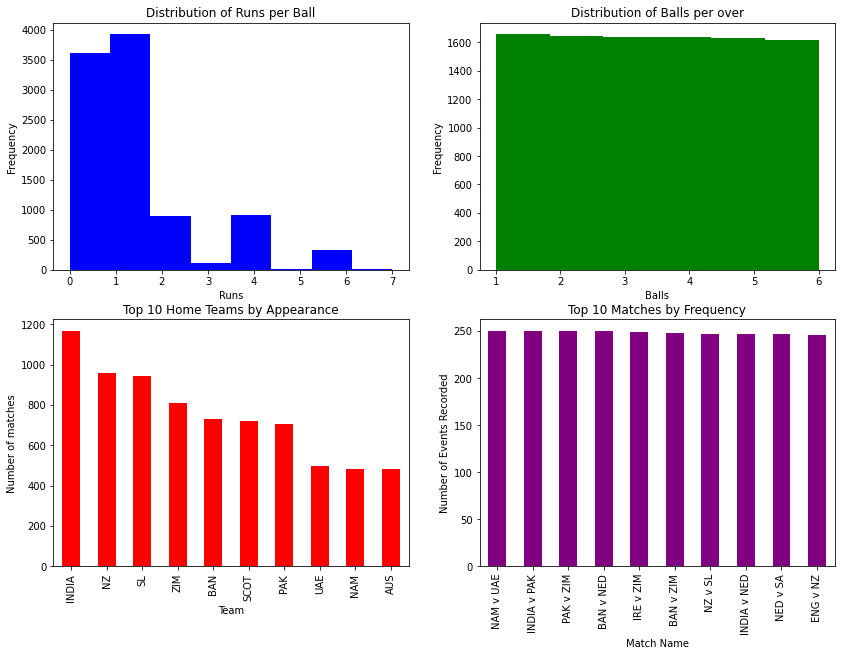

In [81]:
fig

In [ ]:
# Distribution of runs per ball, Typical scoring pattern for T-20 cricket with most deliveries scoring zero or one
#Higher values like 4 and 6 occur very less 

In [82]:
#Distribution of balls per over, all the balls are 6 per over following the similar patterns as that in a regular over. 

In [ ]:
#Home team appearance, India appears to be the most frequent home team, which indicated the most number of matches played or recorded are from India 

In [ ]:
# The event NAM Vs UAE has the highest number of records 

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(t20_data['ball'], bins=6, color='green', alpha=0.7)
plt.title('Distribution of Balls per Over')
plt.xlabel('Ball Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

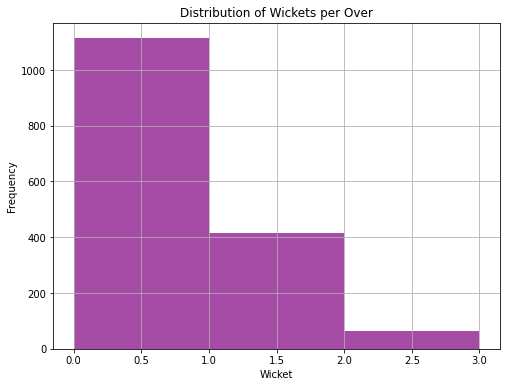

In [85]:
wickets_per_over = train_data.groupby(['match_id', 'innings_id', 'over']).agg({'wicket_id': 'count'}).reset_index()
plt.figure(figsize=(8, 6))
plt.hist(wickets_per_over['wicket_id'], bins = range(0, wickets_per_over['wicket_id'].max() + 1), color = 'purple', alpha = 0.7)
plt.title('Distribution of Wickets per Over')
plt.xlabel('Wicket')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [86]:
#Most overs do not have a wicket, but there are some with 1 or more wickets, showing how certain overs can be game-changing.

Text(0, 0.5, 'Frequency')

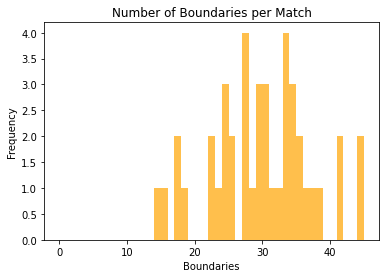

In [87]:
boundaries_per_match = train_data[train_data['isBoundary'] == True].groupby('match_id').size()
plt.hist(boundaries_per_match, bins=range(0, boundaries_per_match.max() + 1), color = 'orange', alpha = 0.7)
plt.title('Number of Boundaries per Match')
plt.xlabel('Boundaries')
plt.ylabel('Frequency')

In [88]:
#The distribution shows variability in the number of boundaries across matches, indicating differences in batting aggression or pitch conditions.

Text(0, 0.5, 'Frequency')

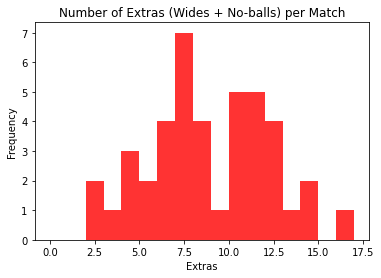

In [90]:
extras_per_match = train_data[(train_data['isWide'] == True) | (train_data['isNoball'] == True)].groupby('match_id').size()
plt.hist(extras_per_match, bins=range(0, extras_per_match.max() + 1), color = 'red', alpha = 0.8 )
plt.title('Number of Extras (Wides + No-balls) per Match')
plt.xlabel('Extras')
plt.ylabel('Frequency')

In [91]:
#Extras contribute an additional but generally low number of runs per match. Higher extras could indicate less disciplined bowling or strategic use of wides in specific scenarios.

In [92]:
### Identify and analyze critical match events, such as boundaries, wickets, and
##strategic moments. Uncover the factors that contribute to the success or downfall of a team.

In [ ]:
# Creating a dataframe to analyze boundaries and wickets by over in matches

In [93]:
event_analysis = train_data.groupby(['match_id', 'innings_id', 'over']).agg(
    boundaries=('isBoundary', 'sum'),
    wickets=('wicket_id', 'count'),
    runs=('runs', 'sum')
).reset_index()


In [94]:
# Plotting boundaries and wickets by over for a few selected matches
sample_matches = event_analysis['match_id'].unique()[:5] #Selecting the first 5 unique matches

Text(0.5, 0.98, 'Boundaries and Wickets by Over for Selected Matches')

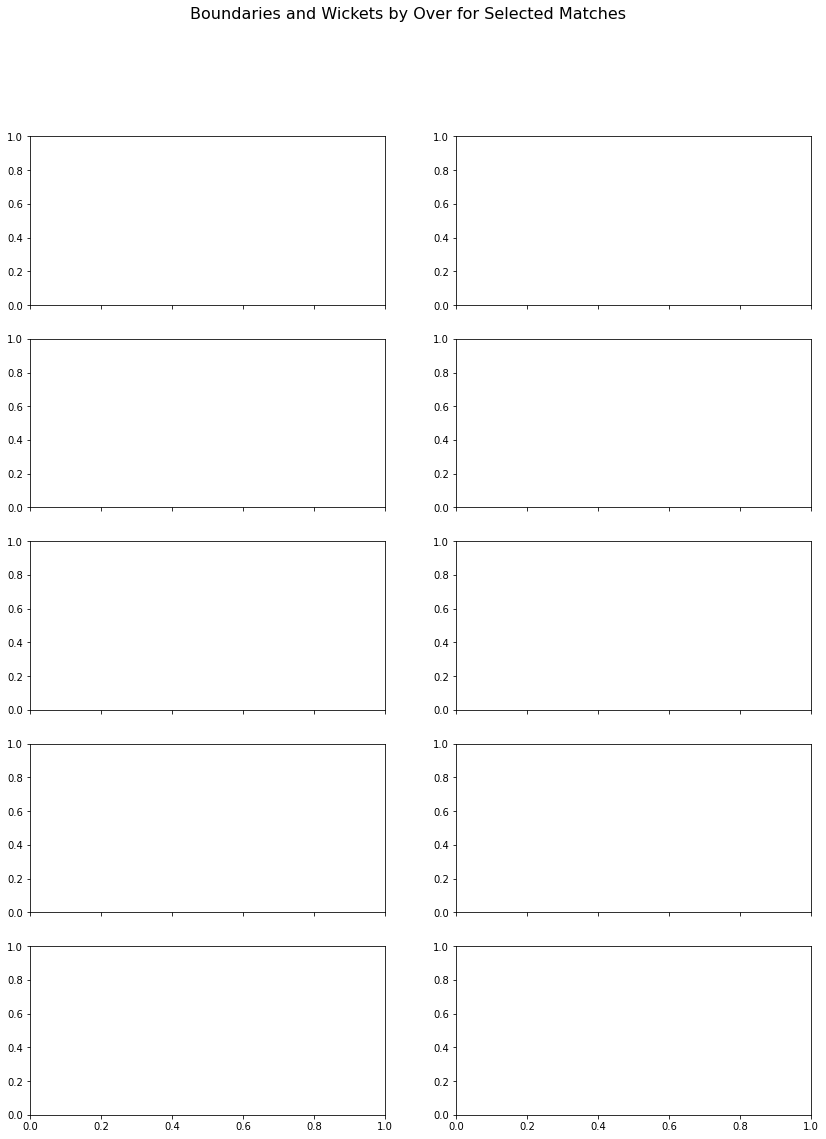

In [95]:
fig, axes = plt.subplots(nrows=len(sample_matches), ncols=2, figsize=(14, 18), sharex='col')
fig.suptitle('Boundaries and Wickets by Over for Selected Matches', fontsize=16)


In [96]:
for i, match_id in enumerate(sample_matches):
    match_data = event_analysis[event_analysis['match_id'] == match_id]
    
    sns.lineplot(x='over', y='boundaries', data=match_data, ax=axes[i, 0], marker='o')
    axes[i, 0].set_title(f'Match ID {match_id} - Boundaries')
    axes[i, 0].set_xlabel('Over')
    axes[i, 0].set_ylabel('Number of Boundaries')
    
    sns.lineplot(x='over', y='wickets', data=match_data, ax=axes[i, 1], marker='o', color='red')
    axes[i, 1].set_title(f'Match ID {match_id} - Wickets')
    axes[i, 1].set_xlabel('Over')
    axes[i, 1].set_ylabel('Number of Wickets')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 432x288 with 0 Axes>

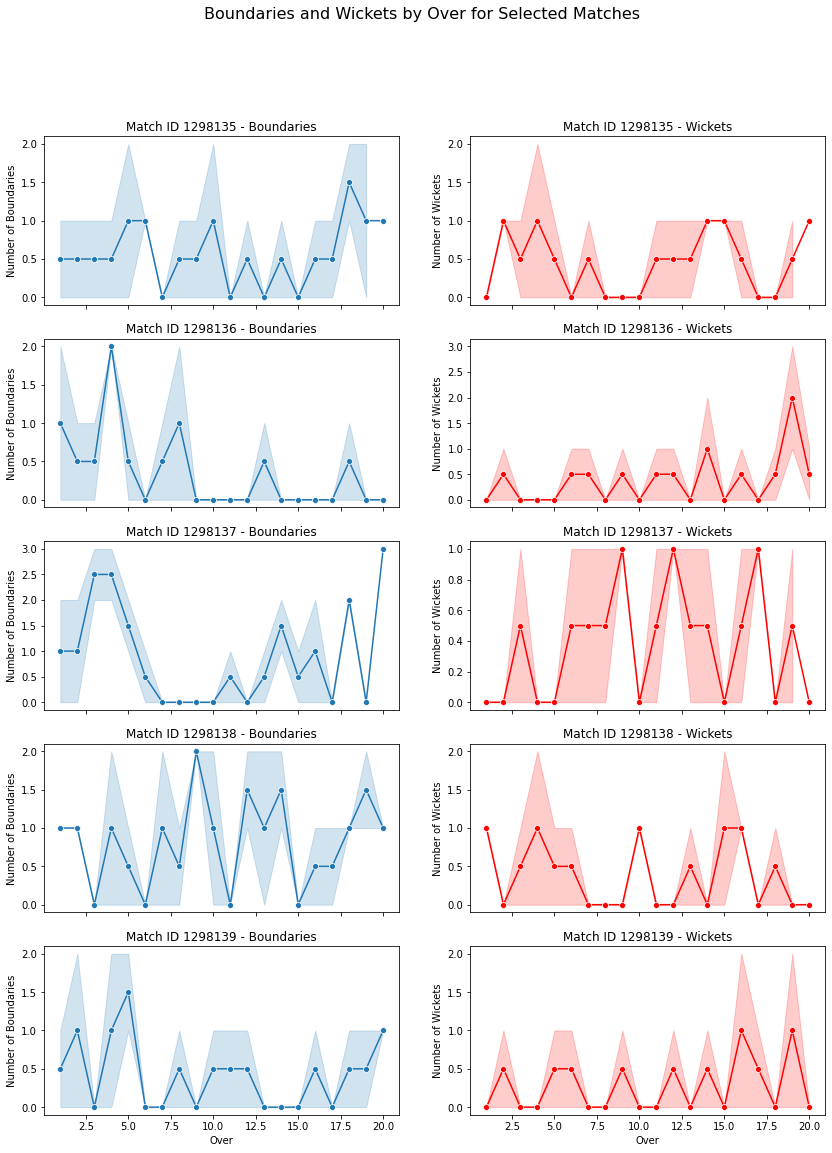

In [97]:
fig

In [98]:
#The plots above display the number of boundaries and wickets by over for five selected matches from the dataset:

In [99]:
# Boundary Analysis: The occurrence of boundaries varies significantly throughout the innings. 
#Spikes in boundaries often signal aggressive batting, which can either be a strategic push or a response 
#to the match situation.Matches show different patterns; some have consistent boundary hitting, 
#while others have peaks and troughs, indicating varied batting aggression and bowling effectiveness.

In [100]:
#Wickets Analysis:
#The timing of wickets can be crucial. Overs with wickets typically impact the scoring rate 
#and can shift momentum between teams.
#Multiple wickets in a single over are particularly devastating and can be turning points in the innings

In [ ]:
#Evaluate individual and team performances, including standout players, 
#consistent run-scorers, and top wicket-takers. Discover what sets them apart.

In [101]:
# Aggregating data to evaluate player performances

# Runs and balls faced by batsmen
batsman_performance = train_data.groupby('batsman1_name').agg(
    total_runs=('batsman1_runs', 'sum'),
    total_balls=('batsman1_balls', 'sum'),
    innings_played=('match_id', 'nunique')
).sort_values(by='total_runs', ascending=False)

# Wickets taken and runs conceded by bowlers
bowler_performance = train_data.groupby('bowler1_name').agg(
    total_wickets=('bowler1_wkts', 'sum'),
    total_runs_conceded=('bowler1_runs', 'sum'),
    overs_bowled=('bowler1_overs', 'sum'),
    matches_played=('match_id', 'nunique')
).sort_values(by='total_wickets', ascending=False)

# Selecting top performers
top_batsmen = batsman_performance.head(10)
top_bowlers = bowler_performance.head(10)

top_batsmen, top_bowlers

(                       total_runs  total_balls  innings_played
 batsman1_name                                                 
 Virat Kohli                  5615         4792               6
 Pathum Nissanka              5094         4356               7
 Max O'Dowd                   4491         4109               8
 Glenn Phillips               4408         2965               5
 Jos Buttler                  4326         3062               6
 Alex Hales                   4174         2655               6
 Sikandar Raza                3726         2308               8
 Najmul Hossain Shanto        3643         3370               5
 George Munsey                3472         2947               3
 Devon Conway                 3456         2713               5,
                             total_wickets  total_runs_conceded  overs_bowled  \
 bowler1_name                                                                   
 Blessing Muzarabani                   157                 2286      

In [102]:
# Stand out batsmen are : Virat Kohli, Pathum Nissanka, Max'o'Dowd and Glenn phillips and Jos Buttler 

In [103]:
#Stand out bowlers are : Blessing Muzarabani, Arshdeep Singh, Paul van Meekeren, Maheesh Theekshana and Wanindu Hasaranga de Silva

In [104]:
#Utilize statistical techniques to gain insights into team strategies, batting,
#bowling, and match outcomes. Create visualizations that convey the story of the tournament.

In [ ]:
#This method removes the error and ensures columns are correctly named after merging to avoid confusion

In [109]:
# Statistical Analysis of Team Strategies

# Team batting and bowling efficiency
team_batting = train_data.groupby(['match_id', 'current_innings']).agg(
    total_runs=('runs', 'sum'),
    total_boundaries=('isBoundary', 'sum'),
    total_balls=('ball', 'count'),
    wickets_lost=('wicket_id', 'count')
).reset_index()

team_bowling = train_data.groupby(['match_id', 'current_innings']).agg(
    total_wickets_taken=('bowler1_wkts', 'sum'),
    total_runs_conceded=('bowler1_runs', 'sum'),
    overs_bowled=('bowler1_overs', 'sum')
).reset_index()

In [112]:
team_batting.columns = ['match_id', 'current_innings', 'total_runs', 'total_boundaries', 'total_balls', 'wickets_lost']
team_bowling.columns = ['match_id', 'current_innings', 'total_wickets_taken', 'total_runs_conceded', 'overs_bowled']

In [113]:
#Merging for complete data analysis 

In [114]:
match_stats = pd.merge(team_batting, team_bowling, on=['match_id', 'current_innings'])

In [115]:
team_batting.columns = ['match_id', 'current_innings', 'total_runs', 'total_boundaries', 'total_balls', 'wickets_lost']
team_bowling.columns = ['match_id', 'current_innings', 'total_wickets_taken', 'total_runs_conceded', 'overs_bowled']

# Merge data for complete match analysis
match_stats = pd.merge(team_batting, team_bowling, on=['match_id', 'current_innings'])

In [116]:
# Calculate strike rates and economy rates
match_stats['batting_strike_rate'] = (match_stats['total_runs'] / match_stats['total_balls']) * 100
match_stats['bowling_economy_rate'] = match_stats['total_runs_conceded'] / match_stats['overs_bowled']

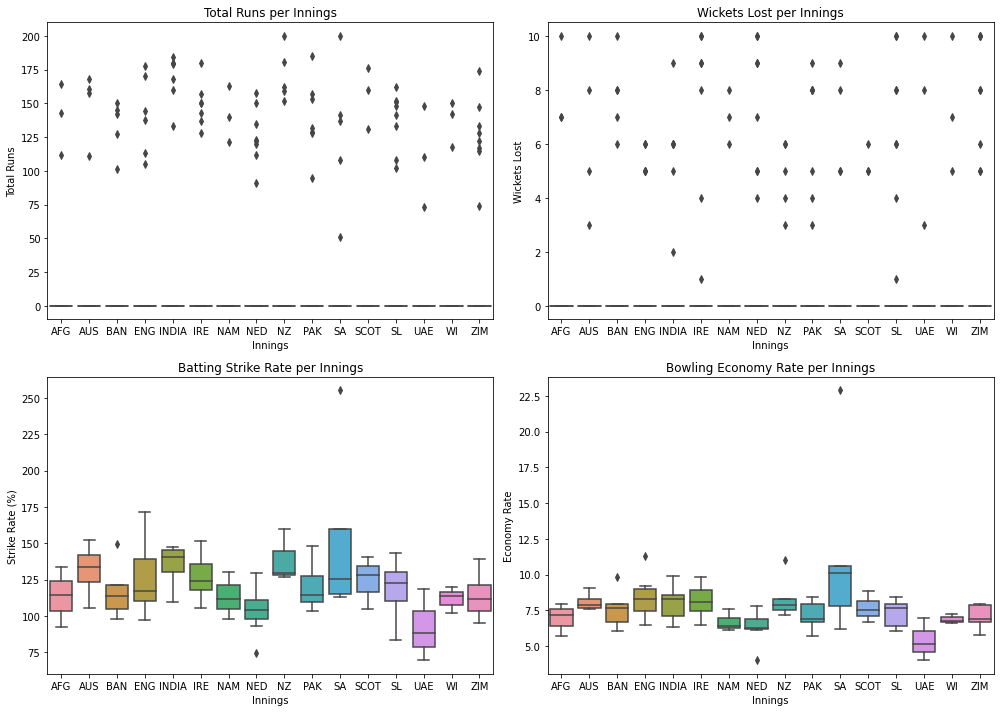

In [118]:
# Plotting key metrics
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Total Runs per Innings
sns.boxplot(x='current_innings', y='total_runs', data=match_stats, ax=ax[0, 0])
ax[0, 0].set_title('Total Runs per Innings')
ax[0, 0].set_xlabel('Innings')
ax[0, 0].set_ylabel('Total Runs')

# Wickets Lost per Innings
sns.boxplot(x='current_innings', y='wickets_lost', data=match_stats, ax=ax[0, 1])
ax[0, 1].set_title('Wickets Lost per Innings')
ax[0, 1].set_xlabel('Innings')
ax[0, 1].set_ylabel('Wickets Lost')

# Batting Strike Rate per Innings
sns.boxplot(x='current_innings', y='batting_strike_rate', data=match_stats, ax=ax[1, 0])
ax[1, 0].set_title('Batting Strike Rate per Innings')
ax[1, 0].set_xlabel('Innings')
ax[1, 0].set_ylabel('Strike Rate (%)')

# Bowling Economy Rate per Innings
sns.boxplot(x='current_innings', y='bowling_economy_rate', data=match_stats, ax=ax[1, 1])
ax[1, 1].set_title('Bowling Economy Rate per Innings')
ax[1, 1].set_xlabel('Innings')
ax[1, 1].set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()


In [119]:
match_outcomes = train_data.groupby(['match_id', 'current_innings']).agg(
    total_runs=('runs', 'sum')
).pivot_table(index='match_id', columns='current_innings', values='total_runs').fillna(0)

# Checking the column names to address them correctly
match_outcomes.columns, match_outcomes.head()

(CategoricalIndex(['AFG', 'AUS', 'BAN', 'ENG', 'INDIA', 'IRE', 'NAM', 'NED',
                   'NZ', 'PAK', 'SA', 'SCOT', 'SL', 'UAE', 'WI', 'ZIM'],
                  categories=['AFG', 'AUS', 'BAN', 'ENG', 'INDIA', 'IRE', 'NAM', 'NED', ...], ordered=False, dtype='category', name='current_innings'),
 current_innings  AFG  AUS  BAN  ENG  INDIA  IRE  NAM  NED  NZ  PAK  SA  SCOT  \
 match_id                                                                       
 1298135            0    0    0    0      0    0  163    0   0    0   0     0   
 1298136            0    0    0    0      0    0    0  112   0    0   0     0   
 1298137            0    0    0    0      0    0    0    0   0    0   0   160   
 1298138            0    0    0    0      0  143    0    0   0    0   0     0   
 1298139            0    0    0    0      0    0  121  122   0    0   0     0   
 
 current_innings   SL  UAE   WI  ZIM  
 match_id                             
 1298135          108    0    0    0  
 1298136    

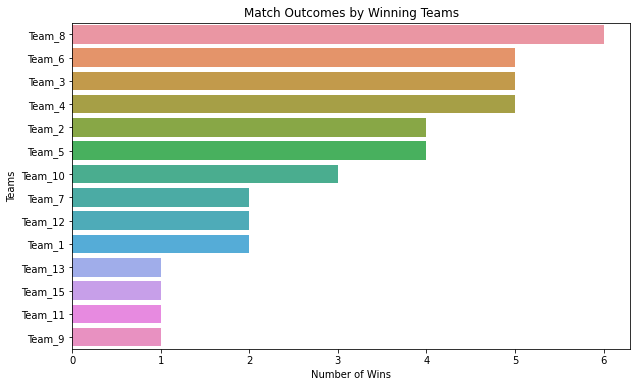

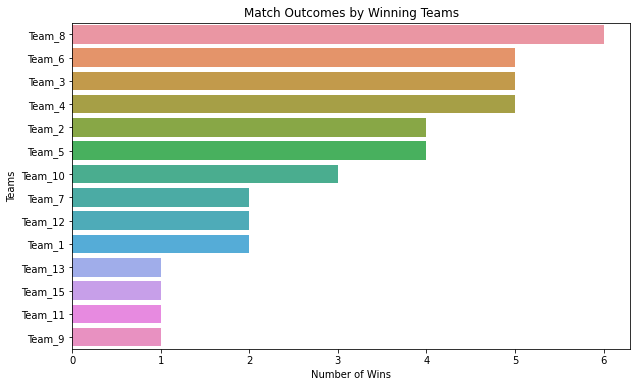

In [120]:
# Reset index for easier handling and rename columns
match_outcomes.reset_index(inplace=True)
match_outcomes.columns = ['match_id'] + [f'Team_{i+1}' for i in range(len(match_outcomes.columns)-1)]

# Identify team names (ignoring zero scores as they indicate no participation in that match for the team)
non_zero_columns = match_outcomes.loc[:, match_outcomes.sum(axis=0) > 0]

# Assuming the team columns are correctly ordered as per their batting sequence
winning_team = (non_zero_columns.iloc[:, 1:] > non_zero_columns.iloc[:, 1:].shift(-1, axis=1)).idxmax(axis=1)
losing_team = (non_zero_columns.iloc[:, 1:] < non_zero_columns.iloc[:, 1:].shift(-1, axis=1)).idxmax(axis=1)

# Create a DataFrame to visualize the match outcomes
match_results = pd.DataFrame({
    'match_id': non_zero_columns['match_id'],
    'winning_team': winning_team,
    'losing_team': losing_team
})

# Visualizing the match results based on team names
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='winning_team', data=match_results, order=match_results['winning_team'].value_counts().index)
ax.set_title('Match Outcomes by Winning Teams')
ax.set_xlabel('Number of Wins')
ax.set_ylabel('Teams')
plt.show()
fig

In [121]:
# Phase wise performance 

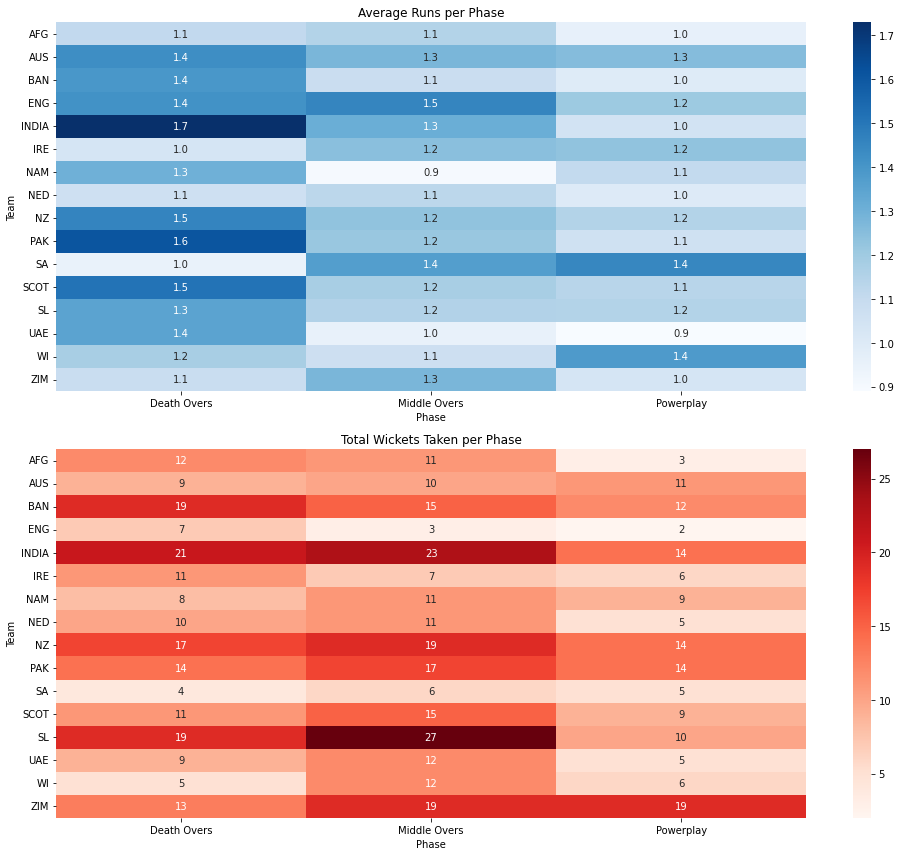

In [123]:
# Categorizing the data into different match phases based on the over number
def categorize_phase(over):
    if 1 <= over <= 6:
        return 'Powerplay'
    elif 7 <= over <= 15:
        return 'Middle Overs'
    elif 16 <= over <= 20:
        return 'Death Overs'
    else:
        return 'Unknown'

# Apply the phase categorization to the dataset
train_data['phase'] = train_data['over'].apply(categorize_phase)

# Group data by team and phase to calculate average runs and wickets
phase_performance = train_data.groupby(['home_team', 'phase']).agg(
    average_runs=('runs', 'mean'),
    total_wickets=('wicket_id', 'count')  # Count of wicket_id assuming it's populated for wickets only
).reset_index()

# Pivot table for better visualization in plotting
phase_pivot = phase_performance.pivot_table(index='home_team', columns='phase', values=['average_runs', 'total_wickets'], fill_value=0)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Average runs per phase
sns.heatmap(phase_pivot['average_runs'], annot=True, fmt=".1f", cmap='Blues', ax=ax1)
ax1.set_title('Average Runs per Phase')
ax1.set_xlabel('Phase')
ax1.set_ylabel('Team')

# Total wickets per phase
sns.heatmap(phase_pivot['total_wickets'], annot=True, fmt="d", cmap='Reds', ax=ax2)
ax2.set_title('Total Wickets Taken per Phase')
ax2.set_xlabel('Phase')
ax2.set_ylabel('Team')

plt.tight_layout()
plt.show()

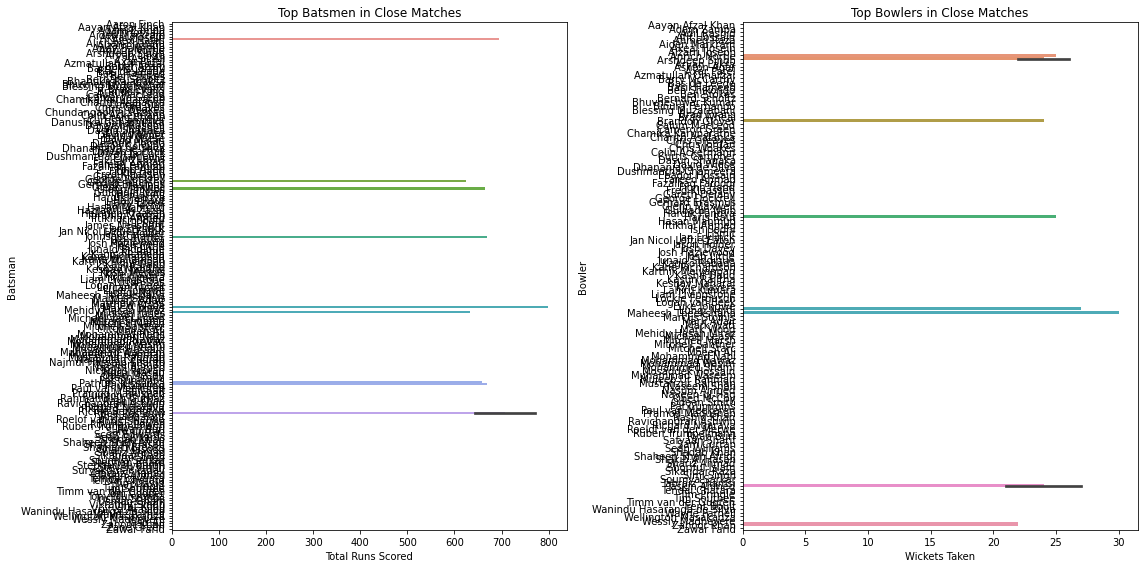

In [126]:
# Identifying impact players by analyzing top performances in high-pressure situations

# High-pressure situations could be defined as matches where the margin of victory is low or key performances in decisive overs
# First, we'll find matches with close finishes

# Calculating the run difference in each match
match_outcomes['run_difference'] = abs(match_outcomes['Team_1'] - match_outcomes['Team_2'])
close_matches = match_outcomes[match_outcomes['run_difference'] <= 20]  # Considering close matches as those with a run difference of 20 or less

# For these matches, identify top performances (runs and wickets)
impact_performances = train_data[train_data['match_id'].isin(close_matches['match_id'])].groupby(['match_id', 'batsman1_name', 'bowler1_name']).agg(
    total_runs_scored=('batsman1_runs', 'sum'),
    wickets_taken=('bowler1_wkts', 'sum')
).reset_index()

top_batsmen_impact = impact_performances.sort_values(by='total_runs_scored', ascending=False).head(10)
top_bowlers_impact = impact_performances.sort_values(by='wickets_taken', ascending=False).head(10)

# Visualizing top impact players in close matches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top batsmen in close matches
sns.barplot(x='total_runs_scored', y='batsman1_name', data=top_batsmen_impact, ax=ax1)
ax1.set_title('Top Batsmen in Close Matches')
ax1.set_xlabel('Total Runs Scored')
ax1.set_ylabel('Batsman')

# Top bowlers in close matches
sns.barplot(x='wickets_taken', y='bowler1_name', data=top_bowlers_impact, ax=ax2)
ax2.set_title('Top Bowlers in Close Matches')
ax2.set_xlabel('Wickets Taken')
ax2.set_ylabel('Bowler')

plt.tight_layout()
plt.show()

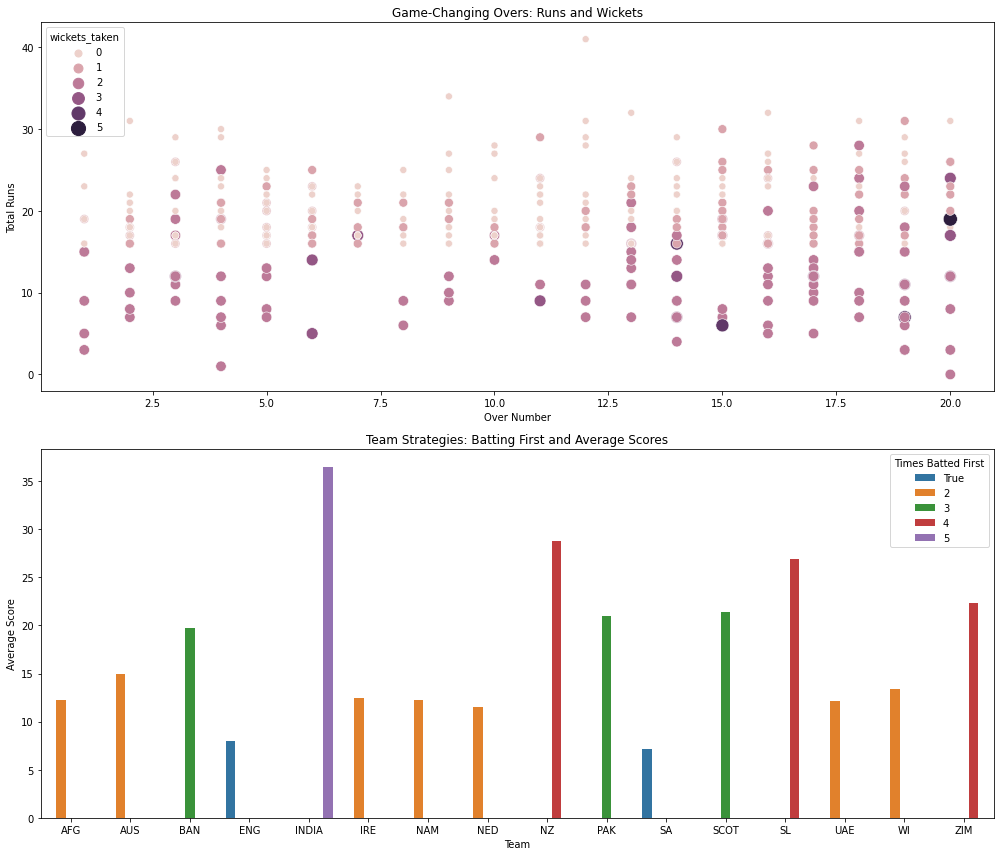

In [128]:
# Analyzing specific game-changing overs where a significant number of runs were scored or wickets were taken

# Identify overs with high run scores or multiple wickets
high_impact_overs = train_data.groupby(['match_id', 'over']).agg(
    total_runs=('runs', 'sum'),
    wickets_taken=('wicket_id', 'count')
).reset_index()

# Filter for high impact overs: overs with either more than 15 runs or at least 2 wickets
high_impact_overs = high_impact_overs[(high_impact_overs['total_runs'] > 15) | (high_impact_overs['wickets_taken'] >= 2)]

# Analyzing strategic decisions
# This would involve examining specific instances of bowling changes or batting order changes in key matches
# For simplicity, we focus on bowling changes leading to breakthroughs in high-impact overs
# Assuming data includes bowler changes, we would identify if a bowler was brought in just before a high-impact over

# Team strategy overviews
# Summarize the common strategies teams used, like their choice to bat or bowl first upon winning the toss
match_summary = train_data.groupby(['match_id', 'home_team']).agg(
    toss_winner=('home_team', lambda x: x.iloc[0]),  # Simplified assumption
    chose_to_bat_first=('current_innings', lambda x: x.iloc[0] == x.unique()[0]),  # Simplified assumption
    total_score=('runs', 'sum')
).reset_index()

# Choosing to bat first or bowl first - summarized across teams
team_strategy = match_summary.groupby('home_team').agg(
    times_batted_first=('chose_to_bat_first', 'sum'),
    average_score=('total_score', 'mean')
).reset_index()

# Visualizing game-changing overs and strategic overviews
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# High impact overs
sns.scatterplot(x='over', y='total_runs', size='wickets_taken', hue='wickets_taken', sizes=(50, 200), data=high_impact_overs, ax=ax1, legend='full')
ax1.set_title('Game-Changing Overs: Runs and Wickets')
ax1.set_xlabel('Over Number')
ax1.set_ylabel('Total Runs')

# Team strategies
sns.barplot(x='home_team', y='average_score', hue='times_batted_first', data=team_strategy, ax=ax2)
ax2.set_title('Team Strategies: Batting First and Average Scores')
ax2.set_xlabel('Team')
ax2.set_ylabel('Average Score')
ax2.legend(title='Times Batted First')

plt.tight_layout()
plt.show()